In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16

In [ ]:
# LOAD THE MODEL
model = VGG16()

In [ ]:
model.summary()

In [ ]:
for i in range(len(model.layers)):

  # check for convolutional layer
  if 'conv' not in model.layers[i].name :
    continue

  # get filter weights

  filters, biases = model.layers[i].get_weights()

  print(" Layer No. ", i, model.layers[i].name, filters.shape)



In [ ]:
# retrieve weights from the second hidden layer

filters, bias = model.layers[1].get_weights()

In [ ]:
# normalize filter values to 0 - 1, so we can visualize them

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters)

In [ ]:
import matplotlib.pyplot as plt

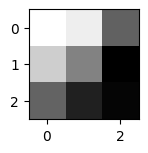

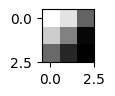

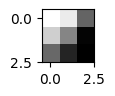

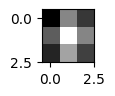

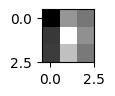

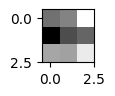

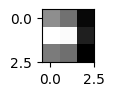

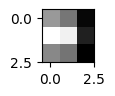

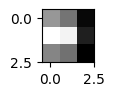

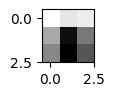

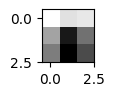

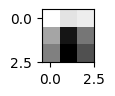

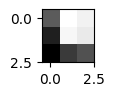

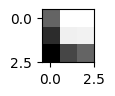

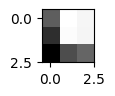

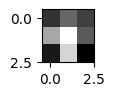

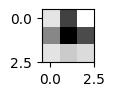

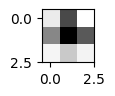

In [ ]:
n_filters = 6
ix = 1
fig = plt.figure(figsize = (15,10))

for i in range(n_filters) :

  # get the filters
  f = filters[:,:,:,i]

  for j in range(3) :

    # subplot for 6 filters and 3 channels

    plt.subplot(n_filters,3,ix)
    plt.imshow(f[:,:,j], cmap = 'gray')
    ix = 1

# apply the filters
    plt.show()

In [ ]:
from tensorflow.keras import Model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing import image
# and use
# image.ImageDataGenerator()
# image.load_img()
from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import expand_dims

In [ ]:
from tensorflow.python.keras.layers import Input, Lambda
from tensorflow.python.keras.backend import expand_dims

In [ ]:
model = Model(inputs = model.inputs, outputs = model.layers[1].output)

In [ ]:
image1 = image.load_img("/content/kohli.jpeg", target_size = (224,224))

FileNotFoundError: ignored

In [ ]:
image2 = img_to_array(image1)

In [ ]:
image3 = expand_dims(image2,axis = 0)

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
image4 = preprocess_input(image3)

In [ ]:
#calculating features_map
features = model.predict(image4)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

In [ ]:
from sys import platlibdir
model2 = VGG16()
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

feature_map = model3.predict(image4)

for i,fmap in zip(layer_index,feature_map):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')

plt.show()